In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as opt
import numpy as np

%run ../ICMEmodelClass.py


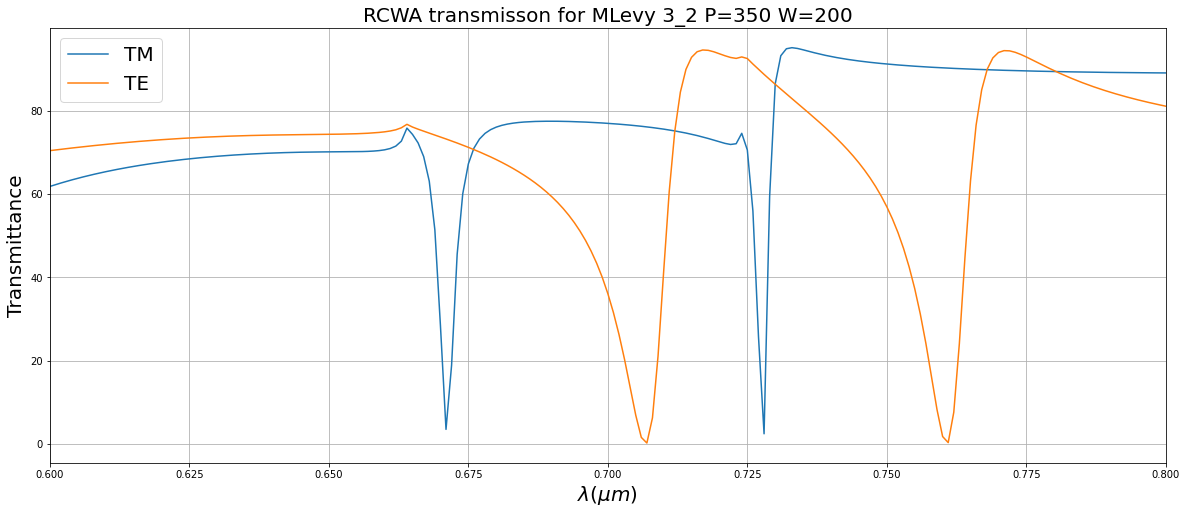

In [18]:
rcwa_data = np.loadtxt('Itmoke_transm.dat')
wl = rcwa_data[:rcwa_data.shape[0]//2,0]
TM_transm = rcwa_data[rcwa_data[:,1] == 0][:, 2]
TE_transm = rcwa_data[rcwa_data[:,1] == 90][:, 2]

fig, ax = plt. subplots(figsize=(20, 8))
ax.set_title('RCWA transmisson for MLevy 3_2 P=350 W=200', size=20)
ax.plot(wl, TM_transm, label='TM')
ax.plot(wl, TE_transm, label='TE')
ax.grid()
ax.set_xlim((0.6, 0.8))
ax.set_xlabel('$\lambda (\mu m)$', size=20)
ax.set_ylabel('Transmittance', size=20)
ax.legend(fontsize=20)


Text(0, 0.5, '$|Torque_z|$')

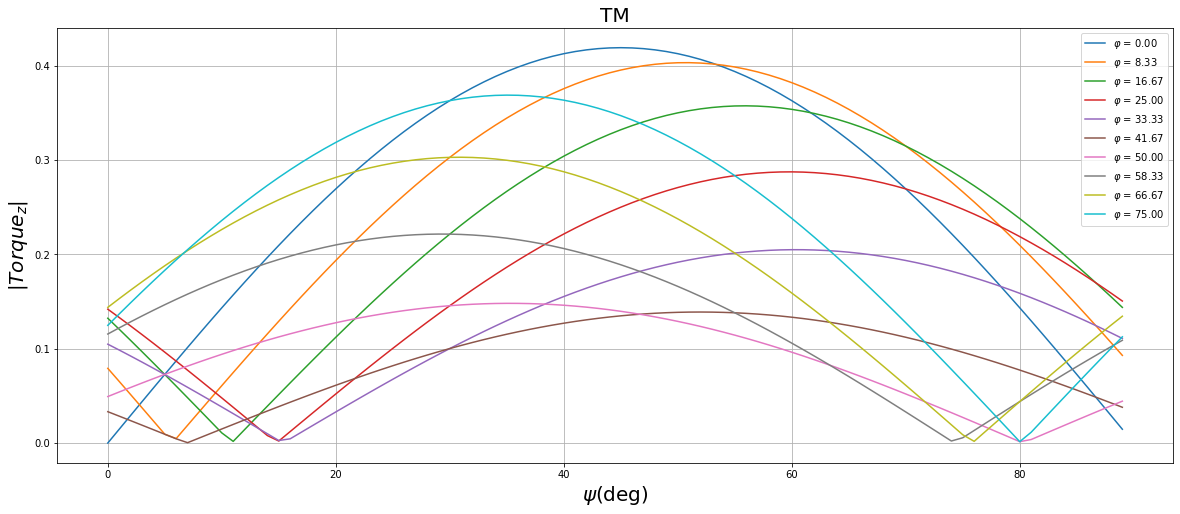

In [27]:
ic = ICMEmodel(0.31, 1, 2.5, 2)

#TM_res 702 nm TE 732nm
lam = 0.702
beta = ic.sol_mode_eq(lam, 'TM', N=0)
Z = np.linspace(0, 0.3, 100)
E = ic.normalize_E(ic.get_E_field_TM(beta, lam, Z))
PSI = np.arange(0, np.pi/2, 1/180*np.pi)
PHI = np.linspace(0, np.pi*7.5/18, 10)

plt.figure(figsize=(20, 8))
for phi in PHI:
    Tor = []
    for psi in PSI:
        H = ic.get_H(1, psi, 0)
        M = ic.get_M_from_H(H, phi)
        tmp = ic.get_icme_torque(E, H, M, phi)
        Tor.append(tmp.mean(axis=0)[2])

    plt.plot(PSI/np.pi*180, np.abs(Tor), label=rf"$\varphi$ = {phi*180/np.pi:.2f}")

plt.grid()
plt.legend()
plt.title('TM', size=20)
plt.xlabel("$\psi$(deg)", size=20)
plt.ylabel("$|Torque_z|$", size=20)

Text(0, 0.5, '$|Torque_z|$')

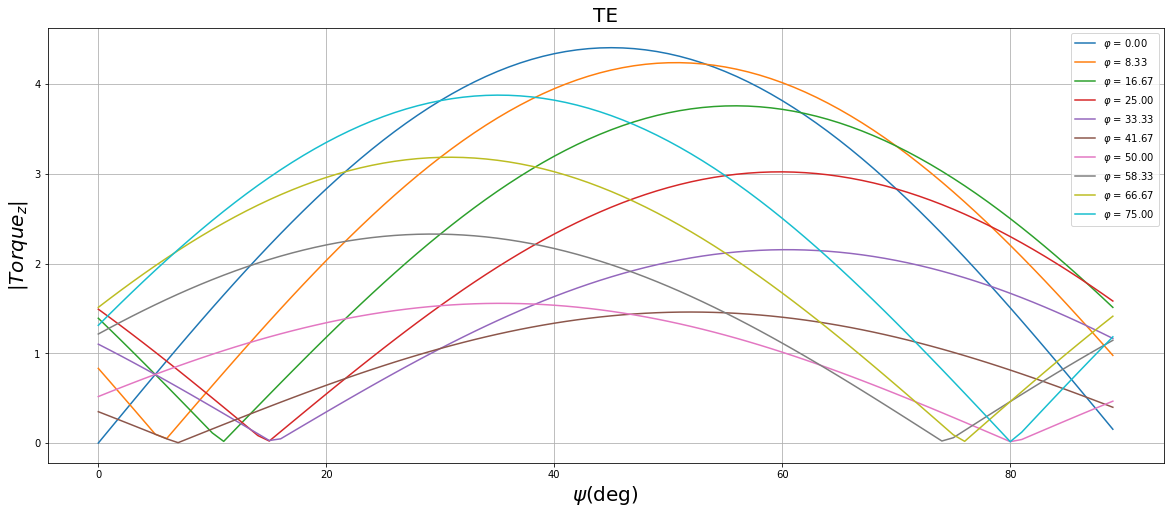

In [28]:
ic = ICMEmodel(0.31, 1, 2.5, 2)

#TM_res 702 nm TE 732nm
lam = 0.732
beta = ic.sol_mode_eq(lam, 'TE', N=0)
Z = np.linspace(0, 0.3, 100)
E = ic.normalize_E(ic.get_E_field_TE(beta, lam, Z))
PSI = np.arange(0, np.pi/2, 1/180*np.pi)
PHI = np.linspace(0, np.pi*7.5/18, 10)

plt.figure(figsize=(20, 8))
for phi in PHI:
    Tor = []
    for psi in PSI:
        H = ic.get_H(1, psi, 0)
        M = ic.get_M_from_H(H, phi)
        tmp = ic.get_icme_torque(E, H, M, phi)
        Tor.append(tmp.mean(axis=0)[2])

    plt.plot(PSI/np.pi*180, np.abs(Tor), label=rf"$\varphi$ = {phi*180/np.pi:.2f}")

plt.grid()
plt.legend()
plt.title('TE', size=20)
plt.xlabel("$\psi$(deg)", size=20)
plt.ylabel("$|Torque_z|$", size=20)